<a href="https://colab.research.google.com/github/minsaee/ai_chat_python/blob/master/401_pandas_2023_%EC%9D%B8%EA%B5%AC%EC%B4%9D%EC%A1%B0%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 국가통계포털_행정구역(시군구)별, 성별 인구수  
 - https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1B040A3&vw_cd=MT_ZTITLE&list_id=A_7&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

### 구글 코랩에서 한글 문제 해결  
- 아래 코드 설치를 한다.  
- 코랩 런타임 -> 런타임 다시 시작 한다.

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/ai_chat_python

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ai_chat_python


In [ ]:
import numpy as np
import pandas as pd
# 그래프라이브러리
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import matplotlib.font_manager

sorted([ f.name for f in  matplotlib.font_manager.fontManager.ttflist if f.name.startswith('Nanum')])

['NanumBarunGothic',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumGothic',
 'NanumGothicCoding',
 'NanumGothicCoding',
 'NanumMyeongjo',
 'NanumMyeongjo',
 'NanumSquare',
 'NanumSquare',
 'NanumSquareRound',
 'NanumSquareRound']

In [ ]:
df_kosis = pd.read_csv('./source/행정구역_시군구_별__성별_인구수_20231130171253.csv', encoding='cp949')
df_kosis.head()

,행정구역(시군구)별,2011.01,2011.01.1,2011.01.2,2011.02,2011.02.1,2011.02.2,2011.03,2011.03.1,2011.03.2,2011.04,2011.04.1,2011.04.2,2011.05,2011.05.1,2011.05.2,2011.06,2011.06.1,2011.06.2,2011.07,2011.07.1,2011.07.2,2011.08,2011.08.1,2011.08.2,2011.09,2011.09.1,2011.09.2,2011.10,2011.10.1,2011.10.2,2011.11,2011.11.1,2011.11.2,2011.12,2011.12.1,2011.12.2,2012.01,2012.01.1,2012.01.2,2012.02,2012.02.1,2012.02.2,2012.03,2012.03.1,2012.03.2,2012.04,2012.04.1,2012.04.2,2012.05,2012.05.1,2012.05.2,2012.06,2012.06.1,2012.06.2,2012.07,2012.07.1,2012.07.2,2012.08,2012.08.1,2012.08.2,2012.09,2012.09.1,2012.09.2,2012.10,2012.10.1,2012.10.2,2012.11,2012.11.1,2012.11.2,2012.12,2012.12.1,2012.12.2,2013.01,2013.01.1,2013.01.2,2013.02,2013.02.1,2013.02.2,2013.03,2013.03.1,2013.03.2,2013.04,2013.04.1,2013.04.2,2013.05,2013.05.1,2013.05.2,2013.06,2013.06.1,2013.06.2,2013.07,2013.07.1,2013.07.2,2013.08,2013.08.1,2013.08.2,2013.09,2013.09.1,2013.09.2,2013.10,2013.10.1,2013.10.2,2013.11,2013.11.1,2013.11.2,2013.12,2013.12.1,2013.12.2,2014.01,2014.01.1,2014.01.2,2014.02,2014.02.1,2014.02.2,2014.03,2014.03.1,2014.03.2,2014.04,2014.04.1,2014.04.2,2014.05,2014.05.1,2014.05.2,2014.06,2014.06.1,2014.06.2,2014.07,2014.07.1,2014.07.2,2014.08,2014.08.1,2014.08.2,2014.09,2014.09.1,2014.09.2,2014.10,2014.10.1,2014.10.2,2014.11,2014.11.1,2014.11.2,2014.12,2014.12.1,2014.12.2,2015.01,2015.01.1,2015.01.2,2015.02,2015.02.1,2015.02.2,2015.03,2015.03.1,2015.03.2,2015.04,2015.04.1,2015.04.2,2015.05,2015.05.1,2015.05.2,2015.06,2015.06.1,2015.06.2,2015.07,2015.07.1,2015.07.2,2015.08,2015.08.1,2015.08.2,2015.09,2015.09.1,2015.09.2,2015.10,2015.10.1,2015.10.2,2015.11,2015.11.1,2015.11.2,2015.12,2015.12.1,2015.12.2,2016.01,2016.01.1,2016.01.2,2016.02,2016.02.1,2016.02.2,2016.03,2016.03.1,2016.03.2,2016.04,2016.04.1,2016.04.2,2016.05,2016.05.1,2016.05.2,2016.06,2016.06.1,2016.06.2,2016.07,2016.07.1,2016.07.2,2016.08,2016.08.1,2016.08.2,2016.09,2016.09.1,2016.09.2,2016.10,2016.10.1,2016.10.2,2016.11,2016.11.1,2016.11.2,2016.12,2016.12.1,2016.12.2,2017.01,2017.01.1,2017.01.2,2017.02,2017.02.1,2017.02.2,2017.03,2017.03.1,2017.03.2,2017.04,2017.04.1,2017.04.2,2017.05,2017.05.1,2017.05.2,2017.06,2017.06.1,2017.06.2,2017.07,2017.07.1,2017.07.2,2017.08,2017.08.1,2017.08.2,2017.09,2017.09.1,2017.09.2,2017.10,2017.10.1,2017.10.2,2017.11,2017.11.1,2017.11.2,2017.12,2017.12.1,2017.12.2,2018.01,2018.01.1,2018.01.2,2018.02,2018.02.1,2018.02.2,2018.03,2018.03.1,2018.03.2,2018.04,2018.04.1,2018.04.2,2018.05,2018.05.1,2018.05.2,2018.06,2018.06.1,2018.06.2,2018.07,2018.07.1,2018.07.2,2018.08,2018.08.1,2018.08.2,2018.09,2018.09.1,2018.09.2,2018.10,2018.10.1,2018.10.2,2018.11,2018.11.1,2018.11.2,2018.12,2018.12.1,2018.12.2,2019.01,2019.01.1,2019.01.2,2019.02,2019.02.1,2019.02.2,2019.03,2019.03.1,2019.03.2,2019.04,2019.04.1,2019.04.2,2019.05,2019.05.1,2019.05.2,2019.06,2019.06.1,2019.06.2,2019.07,2019.07.1,2019.07.2,2019.08,2019.08.1,2019.08.2,2019.09,2019.09.1,2019.09.2,2019.10,2019.10.1,2019.10.2,2019.11,2019.11.1,2019.11.2,2019.12,2019.12.1,2019.12.2,2020.01,2020.01.1,2020.01.2,2020.02,2020.02.1,2020.02.2,2020.03,2020.03.1,2020.03.2,2020.04,2020.04.1,2020.04.2,2020.05,2020.05.1,2020.05.2,2020.06,2020.06.1,2020.06.2,2020.07,2020.07.1,2020.07.2,2020.08,2020.08.1,2020.08.2,2020.09,2020.09.1,2020.09.2,2020.10,2020.10.1,2020.10.2,2020.11,2020.11.1,2020.11.2,2020.12,2020.12.1,2020.12.2,2021.01,2021.01.1,2021.01.2,2021.02,2021.02.1,2021.02.2,2021.03,2021.03.1,2021.03.2,2021.04,2021.04.1,2021.04.2,2021.05,2021.05.1,2021.05.2,2021.06,2021.06.1,2021.06.2,2021.07,2021.07.1,2021.07.2,2021.08,2021.08.1,2021.08.2,2021.09,2021.09.1,2021.09.2,2021.10,2021.10.1,2021.10.2,2021.11,2021.11.1,2021.11.2,2021.12,2021.12.1,2021.12.2,2022.01,2022.01.1,2022.01.2,2022.02,2022.02.1,2022.02.2,2022.03,2022.03.1,2022.03.2,2022.04,2022.04.1,2022.04.2,2022.05,2022.05.1,2022.05.2,2022.06,2022.06.1,2022.06.2,2022.07,2022.07.1,2022.07.2,2022.08,2022.08.1,2022.08.2,2022.09,2022.09.1,2022.09.2,2022.10,2022.10.1,2022.10.2,2022.11,2022

In [ ]:
df_kosis.tail()

,행정구역(시군구)별,2011.01,2011.01.1,2011.01.2,2011.02,2011.02.1,2011.02.2,2011.03,2011.03.1,2011.03.2,2011.04,2011.04.1,2011.04.2,2011.05,2011.05.1,2011.05.2,2011.06,2011.06.1,2011.06.2,2011.07,2011.07.1,2011.07.2,2011.08,2011.08.1,2011.08.2,2011.09,2011.09.1,2011.09.2,2011.10,2011.10.1,2011.10.2,2011.11,2011.11.1,2011.11.2,2011.12,2011.12.1,2011.12.2,2012.01,2012.01.1,2012.01.2,2012.02,2012.02.1,2012.02.2,2012.03,2012.03.1,2012.03.2,2012.04,2012.04.1,2012.04.2,2012.05,2012.05.1,2012.05.2,2012.06,2012.06.1,2012.06.2,2012.07,2012.07.1,2012.07.2,2012.08,2012.08.1,2012.08.2,2012.09,2012.09.1,2012.09.2,2012.10,2012.10.1,2012.10.2,2012.11,2012.11.1,2012.11.2,2012.12,2012.12.1,2012.12.2,2013.01,2013.01.1,2013.01.2,2013.02,2013.02.1,2013.02.2,2013.03,2013.03.1,2013.03.2,2013.04,2013.04.1,2013.04.2,2013.05,2013.05.1,2013.05.2,2013.06,2013.06.1,2013.06.2,2013.07,2013.07.1,2013.07.2,2013.08,2013.08.1,2013.08.2,2013.09,2013.09.1,2013.09.2,2013.10,2013.10.1,2013.10.2,2013.11,2013.11.1,2013.11.2,2013.12,2013.12.1,2013.12.2,2014.01,2014.01.1,2014.01.2,2014.02,2014.02.1,2014.02.2,2014.03,2014.03.1,2014.03.2,2014.04,2014.04.1,2014.04.2,2014.05,2014.05.1,2014.05.2,2014.06,2014.06.1,2014.06.2,2014.07,2014.07.1,2014.07.2,2014.08,2014.08.1,2014.08.2,2014.09,2014.09.1,2014.09.2,2014.10,2014.10.1,2014.10.2,2014.11,2014.11.1,2014.11.2,2014.12,2014.12.1,2014.12.2,2015.01,2015.01.1,2015.01.2,2015.02,2015.02.1,2015.02.2,2015.03,2015.03.1,2015.03.2,2015.04,2015.04.1,2015.04.2,2015.05,2015.05.1,2015.05.2,2015.06,2015.06.1,2015.06.2,2015.07,2015.07.1,2015.07.2,2015.08,2015.08.1,2015.08.2,2015.09,2015.09.1,2015.09.2,2015.10,2015.10.1,2015.10.2,2015.11,2015.11.1,2015.11.2,2015.12,2015.12.1,2015.12.2,2016.01,2016.01.1,2016.01.2,2016.02,2016.02.1,2016.02.2,2016.03,2016.03.1,2016.03.2,2016.04,2016.04.1,2016.04.2,2016.05,2016.05.1,2016.05.2,2016.06,2016.06.1,2016.06.2,2016.07,2016.07.1,2016.07.2,2016.08,2016.08.1,2016.08.2,2016.09,2016.09.1,2016.09.2,2016.10,2016.10.1,2016.10.2,2016.11,2016.11.1,2016.11.2,2016.12,2016.12.1,2016.12.2,2017.01,2017.01.1,2017.01.2,2017.02,2017.02.1,2017.02.2,2017.03,2017.03.1,2017.03.2,2017.04,2017.04.1,2017.04.2,2017.05,2017.05.1,2017.05.2,2017.06,2017.06.1,2017.06.2,2017.07,2017.07.1,2017.07.2,2017.08,2017.08.1,2017.08.2,2017.09,2017.09.1,2017.09.2,2017.10,2017.10.1,2017.10.2,2017.11,2017.11.1,2017.11.2,2017.12,2017.12.1,2017.12.2,2018.01,2018.01.1,2018.01.2,2018.02,2018.02.1,2018.02.2,2018.03,2018.03.1,2018.03.2,2018.04,2018.04.1,2018.04.2,2018.05,2018.05.1,2018.05.2,2018.06,2018.06.1,2018.06.2,2018.07,2018.07.1,2018.07.2,2018.08,2018.08.1,2018.08.2,2018.09,2018.09.1,2018.09.2,2018.10,2018.10.1,2018.10.2,2018.11,2018.11.1,2018.11.2,2018.12,2018.12.1,2018.12.2,2019.01,2019.01.1,2019.01.2,2019.02,2019.02.1,2019.02.2,2019.03,2019.03.1,2019.03.2,2019.04,2019.04.1,2019.04.2,2019.05,2019.05.1,2019.05.2,2019.06,2019.06.1,2019.06.2,2019.07,2019.07.1,2019.07.2,2019.08,2019.08.1,2019.08.2,2019.09,2019.09.1,2019.09.2,2019.10,2019.10.1,2019.10.2,2019.11,2019.11.1,2019.11.2,2019.12,2019.12.1,2019.12.2,2020.01,2020.01.1,2020.01.2,2020.02,2020.02.1,2020.02.2,2020.03,2020.03.1,2020.03.2,2020.04,2020.04.1,2020.04.2,2020.05,2020.05.1,2020.05.2,2020.06,2020.06.1,2020.06.2,2020.07,2020.07.1,2020.07.2,2020.08,2020.08.1,2020.08.2,2020.09,2020.09.1,2020.09.2,2020.10,2020.10.1,2020.10.2,2020.11,2020.11.1,2020.11.2,2020.12,2020.12.1,2020.12.2,2021.01,2021.01.1,2021.01.2,2021.02,2021.02.1,2021.02.2,2021.03,2021.03.1,2021.03.2,2021.04,2021.04.1,2021.04.2,2021.05,2021.05.1,2021.05.2,2021.06,2021.06.1,2021.06.2,2021.07,2021.07.1,2021.07.2,2021.08,2021.08.1,2021.08.2,2021.09,2021.09.1,2021.09.2,2021.10,2021.10.1,2021.10.2,2021.11,2021.11.1,2021.11.2,2021.12,2021.12.1,2021.12.2,2022.01,2022.01.1,2022.01.2,2022.02,2022.02.1,2022.02.2,2022.03,2022.03.1,2022.03.2,2022.04,2022.04.1,2022.04.2,2022.05,2022.05.1,2022.05.2,2022.06,2022.06.1,2022.06.2,2022.07,2022.07.1,2022.07.2,2022.08,2022.08.1,2022.08.2,2022.09,2022.09.1,2022.09.2,2022.10,2022.10.1,2022.10.2,2022.11,2022

In [ ]:
df_kosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Columns: 463 entries, 행정구역(시군구)별 to 2023.10.2
dtypes: object(463)
memory usage: 68.9+ KB


In [ ]:
df_kosis.shape

(19, 463)

In [ ]:
# 모든 columns 보기
pd.options.display.max_columns=829

In [ ]:
pd.options.display.max_rows=829

In [ ]:
df_kosis.head(3)

,행정구역(시군구)별,2011.01,2011.01.1,2011.01.2,2011.02,2011.02.1,2011.02.2,2011.03,2011.03.1,2011.03.2,2011.04,2011.04.1,2011.04.2,2011.05,2011.05.1,2011.05.2,2011.06,2011.06.1,2011.06.2,2011.07,2011.07.1,2011.07.2,2011.08,2011.08.1,2011.08.2,2011.09,2011.09.1,2011.09.2,2011.10,2011.10.1,2011.10.2,2011.11,2011.11.1,2011.11.2,2011.12,2011.12.1,2011.12.2,2012.01,2012.01.1,2012.01.2,2012.02,2012.02.1,2012.02.2,2012.03,2012.03.1,2012.03.2,2012.04,2012.04.1,2012.04.2,2012.05,2012.05.1,2012.05.2,2012.06,2012.06.1,2012.06.2,2012.07,2012.07.1,2012.07.2,2012.08,2012.08.1,2012.08.2,2012.09,2012.09.1,2012.09.2,2012.10,2012.10.1,2012.10.2,2012.11,2012.11.1,2012.11.2,2012.12,2012.12.1,2012.12.2,2013.01,2013.01.1,2013.01.2,2013.02,2013.02.1,2013.02.2,2013.03,2013.03.1,2013.03.2,2013.04,2013.04.1,2013.04.2,2013.05,2013.05.1,2013.05.2,2013.06,2013.06.1,2013.06.2,2013.07,2013.07.1,2013.07.2,2013.08,2013.08.1,2013.08.2,2013.09,2013.09.1,2013.09.2,2013.10,2013.10.1,2013.10.2,2013.11,2013.11.1,2013.11.2,2013.12,2013.12.1,2013.12.2,2014.01,2014.01.1,2014.01.2,2014.02,2014.02.1,2014.02.2,2014.03,2014.03.1,2014.03.2,2014.04,2014.04.1,2014.04.2,2014.05,2014.05.1,2014.05.2,2014.06,2014.06.1,2014.06.2,2014.07,2014.07.1,2014.07.2,2014.08,2014.08.1,2014.08.2,2014.09,2014.09.1,2014.09.2,2014.10,2014.10.1,2014.10.2,2014.11,2014.11.1,2014.11.2,2014.12,2014.12.1,2014.12.2,2015.01,2015.01.1,2015.01.2,2015.02,2015.02.1,2015.02.2,2015.03,2015.03.1,2015.03.2,2015.04,2015.04.1,2015.04.2,2015.05,2015.05.1,2015.05.2,2015.06,2015.06.1,2015.06.2,2015.07,2015.07.1,2015.07.2,2015.08,2015.08.1,2015.08.2,2015.09,2015.09.1,2015.09.2,2015.10,2015.10.1,2015.10.2,2015.11,2015.11.1,2015.11.2,2015.12,2015.12.1,2015.12.2,2016.01,2016.01.1,2016.01.2,2016.02,2016.02.1,2016.02.2,2016.03,2016.03.1,2016.03.2,2016.04,2016.04.1,2016.04.2,2016.05,2016.05.1,2016.05.2,2016.06,2016.06.1,2016.06.2,2016.07,2016.07.1,2016.07.2,2016.08,2016.08.1,2016.08.2,2016.09,2016.09.1,2016.09.2,2016.10,2016.10.1,2016.10.2,2016.11,2016.11.1,2016.11.2,2016.12,2016.12.1,2016.12.2,2017.01,2017.01.1,2017.01.2,2017.02,2017.02.1,2017.02.2,2017.03,2017.03.1,2017.03.2,2017.04,2017.04.1,2017.04.2,2017.05,2017.05.1,2017.05.2,2017.06,2017.06.1,2017.06.2,2017.07,2017.07.1,2017.07.2,2017.08,2017.08.1,2017.08.2,2017.09,2017.09.1,2017.09.2,2017.10,2017.10.1,2017.10.2,2017.11,2017.11.1,2017.11.2,2017.12,2017.12.1,2017.12.2,2018.01,2018.01.1,2018.01.2,2018.02,2018.02.1,2018.02.2,2018.03,2018.03.1,2018.03.2,2018.04,2018.04.1,2018.04.2,2018.05,2018.05.1,2018.05.2,2018.06,2018.06.1,2018.06.2,2018.07,2018.07.1,2018.07.2,2018.08,2018.08.1,2018.08.2,2018.09,2018.09.1,2018.09.2,2018.10,2018.10.1,2018.10.2,2018.11,2018.11.1,2018.11.2,2018.12,2018.12.1,2018.12.2,2019.01,2019.01.1,2019.01.2,2019.02,2019.02.1,2019.02.2,2019.03,2019.03.1,2019.03.2,2019.04,2019.04.1,2019.04.2,2019.05,2019.05.1,2019.05.2,2019.06,2019.06.1,2019.06.2,2019.07,2019.07.1,2019.07.2,2019.08,2019.08.1,2019.08.2,2019.09,2019.09.1,2019.09.2,2019.10,2019.10.1,2019.10.2,2019.11,2019.11.1,2019.11.2,2019.12,2019.12.1,2019.12.2,2020.01,2020.01.1,2020.01.2,2020.02,2020.02.1,2020.02.2,2020.03,2020.03.1,2020.03.2,2020.04,2020.04.1,2020.04.2,2020.05,2020.05.1,2020.05.2,2020.06,2020.06.1,2020.06.2,2020.07,2020.07.1,2020.07.2,2020.08,2020.08.1,2020.08.2,2020.09,2020.09.1,2020.09.2,2020.10,2020.10.1,2020.10.2,2020.11,2020.11.1,2020.11.2,2020.12,2020.12.1,2020.12.2,2021.01,2021.01.1,2021.01.2,2021.02,2021.02.1,2021.02.2,2021.03,2021.03.1,2021.03.2,2021.04,2021.04.1,2021.04.2,2021.05,2021.05.1,2021.05.2,2021.06,2021.06.1,2021.06.2,2021.07,2021.07.1,2021.07.2,2021.08,2021.08.1,2021.08.2,2021.09,2021.09.1,2021.09.2,2021.10,2021.10.1,2021.10.2,2021.11,2021.11.1,2021.11.2,2021.12,2021.12.1,2021.12.2,2022.01,2022.01.1,2022.01.2,2022.02,2022.02.1,2022.02.2,2022.03,2022.03.1,2022.03.2,2022.04,2022.04.1,2022.04.2,2022.05,2022.05.1,2022.05.2,2022.06,2022.06.1,2022.06.2,2022.07,2022.07.1,2022.07.2,2022.08,2022.08.1,2022.08.2,2022.09,2022.09.1,2022.09.2,2022.10,2022.10.1,2022.10.2,2022.11,2022

***깔끔한 데이터(tidy data)***
1. R커뮤니티의 해드리 위컴이  한 논문에서 처음 소개한 개념으로,데이터셋을 구조화하는 프레임워크이다.  
2. 해드리 위컴이 논문에서 제시한 깔끔한 데이터의 조건
   (1) 행은 관측값으로 나타내야 한다.   
   (2) 열은 변수를 나타내야 한다.
   (3) 관측 단위별로 데이터 표를 구성해야 한다.  
3. 해드리 위컴이 저서 <R을 활용한 데이터 과학>에서 하나의 데이터셋, 즉 표에 초점을 두고 깔끔한 데이터 정의를 했다.  
   - 변수는 열로 나타내야 한다.  
   - 관측값은 행으로 나타내야 한다.
   - 값은 셀로 나타내냐 한다.

4. pandas에서 데이터프레임을 깔끔한 데이터로 정리하는데 유용한 melt메서드를 제공한다.


   |메서드 인자|설명|
   |---|---|
   |id_vars| 위치를 그대로 유지할 열의 이름 지정한다.|
   |value_vars|행으로 위치를 변경할 열의 이름을 지정한다. 기본적으로 id_vars로 지정하지 않은 모든 열을 대상으로 설정된다.|
   |var_name|value_vars로 위치를 변경한 열의 이름을 지정한다. 기본값은 'variable' 이다.|
   |value_name|var_name으로 위치를 변경한 열의 데이터를 지정한 열의 이름을 지정한다. 기본값은 'value'이다.|

In [ ]:
# melt() : 데이터를 재구조화
# df = pd.melt(df_kosis, id_vars=['행정구역(시군구)별'])

df = df_kosis.melt(id_vars='행정구역(시군구)별')
df

,행정구역(시군구)별,variable,value
0,행정구역(시군구)별,2011.01,총인구수 (명)
1,전국,2011.01,50534731
2,서울특별시,2011.01,10312835
3,부산광역시,2011.01,3566560
4,대구광역시,2011.01,2512071
...,...,...,...
8773,전라북도,2023.10.2,882636
8774,전라남도,2023.10.2,895644
8775,경상북도,2023.10.2,1265922
8776,경상남도,2023.10.2,1616261


In [ ]:
df.shape

(8778, 3)

In [ ]:
df['행정구역(시군구)별'].unique() # len : 19 (-1) -> '행정구역(시군구)별'

array(['행정구역(시군구)별', '전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시',
       '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원특별자치도', '충청북도', '충청남도',
       '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [ ]:
df = df[df['행정구역(시군구)별']!='행정구역(시군구)별'].copy()

In [ ]:
df

,행정구역(시군구)별,variable,value
1,전국,2011.01,50534731
2,서울특별시,2011.01,10312835
3,부산광역시,2011.01,3566560
4,대구광역시,2011.01,2512071
5,인천광역시,2011.01,2761122
...,...,...,...
8773,전라북도,2023.10.2,882636
8774,전라남도,2023.10.2,895644
8775,경상북도,2023.10.2,1265922
8776,경상남도,2023.10.2,1616261


In [ ]:
df.shape

(8316, 3)

In [ ]:
df['행정구역(시군구)별'].unique()

array(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원특별자치도', '충청북도', '충청남도', '전라북도',
       '전라남도', '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8316 entries, 1 to 8777
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   행정구역(시군구)별  8316 non-null   object
 1   variable    8316 non-null   object
 2   value       8316 non-null   object
dtypes: object(3)
memory usage: 259.9+ KB


In [ ]:
df.sample(5)

,행정구역(시군구)별,variable,value
8139,대전광역시,2022.11.2,725140
3411,경기도,2015.12.2,6222794
7922,제주특별자치도,2022.07.2,338540
7447,제주특별자치도,2021.11.1,339256
4337,인천광역시,2017.05,2946270


**열이름에 변수가 여러개 일때**   
열이름을 분할하고 새로운 열로 할당하기 위해 str접근자를 사용하여 split()메서드를 분할하고 새로운 열을 추가해준다.

In [ ]:
# 분할하고자 하는 colums 확인하기.

print(type(df['variable'])) # <class 'pandas.core.series.Series'>
# print(df['variable'])

# Series에 split자원이 제공되는지 확인하기.
print('split' in dir(pd.Series)) # Series에는 제공하지 않는다.

# str에서는 split자원을 제공한다.
print('split' in dir('str'))

# Series에서 str자원이 제공되는지 확인하기.
print('str' in dir(pd.Series))

print(type(df['variable'].str)) # <class 'pandas.core.strings.accessor.StringMethods'>

# Series return하기.
# print(df['variable'].str.split('.')) # <class 'pandas.core.series.Series'>
# print(df['variable'].str.split('.')[8776][0]) # 연도
# print(df['variable'].str.split('.')[8776][1]) # 월

# DataFrame return 하기.
# print(df['variable'].str.split('.', expand = True)) # <class 'pandas.core.frame.DataFrame'>
print(df['variable'].str.split('.', expand = True)[0]) # [column]

<class 'pandas.core.series.Series'>
False
True
True
<class 'pandas.core.strings.accessor.StringMethods'>
1       2011
2       2011
3       2011
4       2011
5       2011
        ... 
8773    2023
8774    2023
8775    2023
8776    2023
8777    2023
Name: 0, Length: 8316, dtype: object


In [ ]:
# column 추가하기.

df['연도'] = df['variable'].str.split('.', expand = True)[0]
df['월'] = df['variable'].str.split('.', expand = True)[1]
df['성별'] = df['variable'].str.split('.', expand = True)[2]

In [ ]:
df

,행정구역(시군구)별,variable,value,연도,월,성별
1,전국,2011.01,50534731,2011,01,None
2,서울특별시,2011.01,10312835,2011,01,None
3,부산광역시,2011.01,3566560,2011,01,None
4,대구광역시,2011.01,2512071,2011,01,None
5,인천광역시,2011.01,2761122,2011,01,None
...,...,...,...,...,...,...
8773,전라북도,2023.10.2,882636,2023,10,2
8774,전라남도,2023.10.2,895644,2023,10,2
8775,경상북도,2023.10.2,1265922,2023,10,2
8776,경상남도,2023.10.2,1616261,2023,10,2


In [ ]:
df.sample(5)

,행정구역(시군구)별,variable,value,연도,월,성별
3951,제주특별자치도,2016.10,639306,2016,10,None
4652,경상북도,2017.10.1,1352966,2017,10,1
8378,제주특별자치도,2023.03.2,337975,2023,03,2
92,경상북도,2011.02.1,1349953,2011,02,1
5651,울산광역시,2019.04,1152293,2019,04,None


In [ ]:
# 모든 데이터 타입 : object
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8316 entries, 1 to 8777
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   행정구역(시군구)별  8316 non-null   object
 1   variable    8316 non-null   object
 2   value       8316 non-null   object
 3   연도          8316 non-null   object
 4   월           8316 non-null   object
 5   성별          5544 non-null   object
dtypes: object(6)
memory usage: 454.8+ KB


In [ ]:
# 성별column unique()를 return
df['성별'].unique() # None이 포함되어있음.

array([None, '1', '2'], dtype=object)

In [ ]:
# None이 아닌 unique()개수만 return
df['성별'].nunique()

2

In [ ]:
# .value_counts() : 빈도수를 계산한다.
# Series 한정

df['성별'].value_counts()

1    2772
2    2772
Name: 성별, dtype: int64

In [ ]:
# None의 값을 정해준다.
# .fillna('None')
df['성별'] = df['성별'].fillna('전체')

In [ ]:
df.sample(5)

,행정구역(시군구)별,variable,value,연도,월,성별
6336,세종특별자치시,2020.04,345216,2020,04,전체
1033,대전광역시,2012.07,1522581,2012,07,전체
5819,인천광역시,2019.07,2956828,2019,07,전체
6123,인천광역시,2019.12.1,1482249,2019,12,1
8164,충청남도,2022.12,2123037,2022,12,전체


In [ ]:
# column 이름 update하기
# .repalce('','')
df['성별'] = df['성별'].replace('1', '남').replace('2', '여')

In [ ]:
df.sample(5)

,행정구역(시군구)별,variable,value,연도,월,성별
1249,전라북도,2012.10.2,939979,2012,10,여
2994,강원특별자치도,2015.05.1,778923,2015,05,남
2893,인천광역시,2015.03.2,1446811,2015,03,여
5808,충청남도,2019.06.2,1043258,2019,06,여
355,충청남도,2011.07,2090270,2011,07,전체


In [ ]:
df['성별'].value_counts()

전체    2772
남     2772
여     2772
Name: 성별, dtype: int64

In [ ]:
df.columns

Index(['행정구역(시군구)별', 'variable', 'value', '연도', '월', '성별'], dtype='object')

In [ ]:
# rename을 사용하면 자체값을 변경하지는 않는다.
df.rename(mapper={'variable':'기간', 'value':'총인구수'}, axis=1)
df.rename(columns={'variable':'기간', 'value':'총인구수'})

,행정구역(시군구)별,기간,총인구수,연도,월,성별
1,전국,2011.01,50534731,2011,01,전체
2,서울특별시,2011.01,10312835,2011,01,전체
3,부산광역시,2011.01,3566560,2011,01,전체
4,대구광역시,2011.01,2512071,2011,01,전체
5,인천광역시,2011.01,2761122,2011,01,전체
...,...,...,...,...,...,...
8773,전라북도,2023.10.2,882636,2023,10,여
8774,전라남도,2023.10.2,895644,2023,10,여
8775,경상북도,2023.10.2,1265922,2023,10,여
8776,경상남도,2023.10.2,1616261,2023,10,여


In [ ]:
# inplace=True를 사용하면 변경값이 자체값에 저장된다.
df.rename(columns={'variable':'기간', 'value':'총인구수'}, inplace=True)

In [ ]:
df.sample(5)

,행정구역(시군구)별,기간,총인구수,연도,월,성별
7762,경기도,2022.05,13581496,2022,05,전체
5677,전라남도,2019.04.1,938558,2019,04,남
8218,경기도,2023.01,13596091,2023,01,전체
4859,전라북도,2018.02,1849543,2018,02,전체
1595,제주특별자치도,2013.04.2,293030,2013,04,여


In [ ]:
df['총인구수'].unique()

array(['50534731', '10312835', '3566560', ..., '1265922', '1616261',
       '337728'], dtype=object)

In [ ]:
'-' in df['총인구수'].unique()

True

In [ ]:
# '-' -> NaN으로 변경
df['총인구수'] = df['총인구수'].replace('-', np.nan)

In [ ]:
# df['총인구수'] = df['총인구수'].astype(int) # ValueError: cannot convert float NaN to integer
df['총인구수'] = df['총인구수'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8316 entries, 1 to 8777
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   행정구역(시군구)별  8316 non-null   object 
 1   기간          8316 non-null   object 
 2   총인구수        8262 non-null   float64
 3   연도          8316 non-null   object 
 4   월           8316 non-null   object 
 5   성별          8316 non-null   object 
dtypes: float64(1), object(5)
memory usage: 454.8+ KB


In [ ]:
df['총인구수'].describe()

count    8.262000e+03
mean     3.835286e+06
std      8.275651e+06
min      5.050300e+04
25%      7.761190e+05
50%      1.404226e+06
75%      2.485685e+06
max      5.185143e+07
Name: 총인구수, dtype: float64

### 전국 성별 전체

In [ ]:
df_all = df[df['성별']=='전체']

In [ ]:
df_all = df[df['행정구역(시군구)별']=='전국']

In [ ]:
df_all.sample(5)

,행정구역(시군구)별,기간,총인구수,연도,월,성별
7297,전국,2021.09,51667688.0,2021,09,전체
818,전국,2012.03.1,25429184.0,2012,03,남
856,전국,2012.04,50801531.0,2012,04,전체
7012,전국,2021.04,51702100.0,2021,04,전체
4428,전국,2017.06.2,25895313.0,2017,06,여


In [ ]:
df_all = df[(df['행정구역(시군구)별']=='전국') & (df['성별']=='전체')]

In [ ]:
df_all.tail(5)

,행정구역(시군구)별,기간,총인구수,연도,월,성별
8494,전국,2023.06,51392745.0,2023,06,전체
8551,전국,2023.07,51387133.0,2023,07,전체
8608,전국,2023.08,51377213.0,2023,08,전체
8665,전국,2023.09,51370001.0,2023,09,전체
8722,전국,2023.10,51354226.0,2023,10,전체


In [ ]:
print(df_all['행정구역(시군구)별'].unique())
print(df_all['성별'].unique())

['전국']
['전체']


### 전국_전체 pandas를 통한 시각화작업

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 1 to 8722
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   행정구역(시군구)별  154 non-null    object 
 1   기간          154 non-null    object 
 2   총인구수        154 non-null    float64
 3   연도          154 non-null    object 
 4   월           154 non-null    object 
 5   성별          154 non-null    object 
dtypes: float64(1), object(5)
memory usage: 8.4+ KB


In [ ]:
print(dir(df_all))

['T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__contains__', '__copy__', '__dataframe__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rmatmul__', '__rmod__', '__rmul_

In [ ]:
plt.rc('font', family='NanumBarunGothic')

<Axes: >

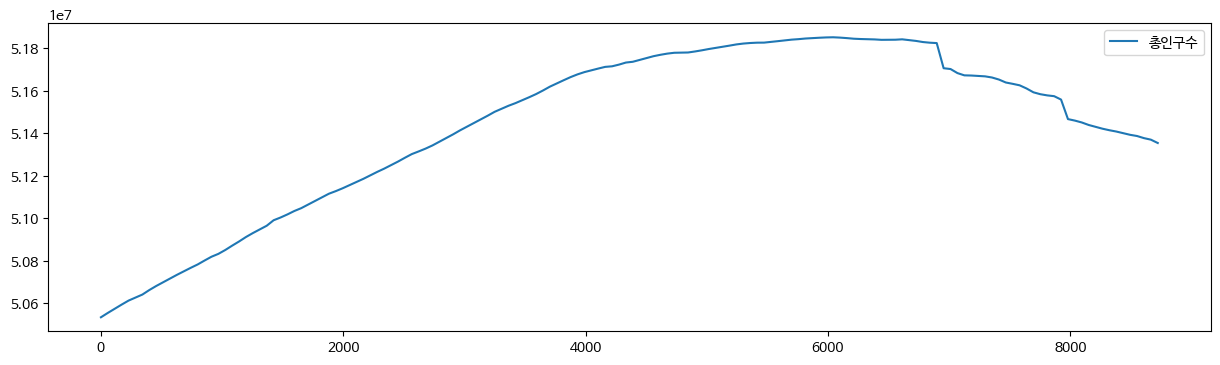

In [ ]:
df_all.plot(figsize=(15,4))

<Axes: xlabel='연도,월'>

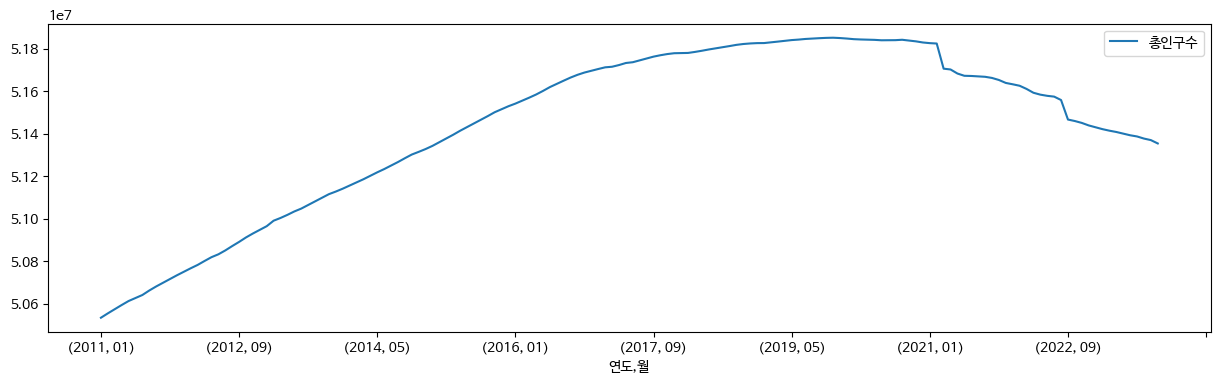

In [ ]:
df_all.set_index(['연도','월']).plot(figsize=(15,4))